# Homework 6
## Problem 1.1
Determine the dew point temperature and composition of the first droplet for a mixture of 70% methanol.
</br></br>
</br></br>
Vapor-Liquid Equilibrium Data for Methanol(A) and Water(B)

|Temp $\degree C$|$y_A$|$x_A$|
|-----|------|-----|
|64.5|1.000|1.000|
|66.0|0.958|0.900|
|69.3|0.870|0.700|
|73.1|0.779|0.500|
|78.0|0.665|0.300|
|84.4|0.517|0.150|
|93.5|0.230|0.040|
|100.0|0.000|0.000|

The data in the table above shows the bubble and dew lines for the methanol-water system. The temperature is the bubble or dew point temperature at a specific composition.
</br></br>
Using this data, the dew point temperature at 70% methanol is found by determining the temperature when $y_A=0.70$. The composition of the first droplet is then found by determining $x_A$ at the dew point temperature.
</br></br>
The code below interpolates to find $T$ when $y_A=0.70$ and then $x_A$ at $T$ scipy.interpolate.interp1d

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

molFrac = np.linspace(0,1,9999)                                             #array of mol frac from 0,1

T = np.array([64.5,66,69.3,73.1,78,84.4,89.3,93.5,100])                     #temp data c
yA = np.array([1,.958,.87,.779,.665,.517,.365,.23,0])                       #sat vap
xA = np.array([1,.9,.7,.5,.3,.15,.08,.04,0])                                #sat liq

interpX = interp1d(xA,T,kind='cubic')                                                    #interpolated sat liq (T=f(x))
interpY = interp1d(yA,T,kind='cubic')                                                    #interpolated sat vap (T=f(y))
interpTx = interp1d(T,xA,kind='cubic')
interpTy = interp1d(T,yA,kind='cubic')


In [2]:
mix = 0.7                                                               #mix comp
Tdew = interpY(mix)                                                     #dew point temp at mix comp

TdewApprox = []                                                         #this loop finds the closest T in the interpolated data to the value of Tdew
for i in interpX(molFrac):
    if i <=Tdew and i >Tdew-0.1:
        TdewApprox.append(i)

xDew = molFrac[interpX(molFrac).tolist().index(max(TdewApprox))]        #comp of first drop
print('T_dew =',Tdew)
print('x_dew =',xDew)

T_dew = 76.46925604119907
x_dew = 0.35247049409881975


The dew point temperature is about $76.5\degree C$ and the composition of the first droplet is about $36$% Methanol.
</br></br>
Below is the solution represented graphically

''

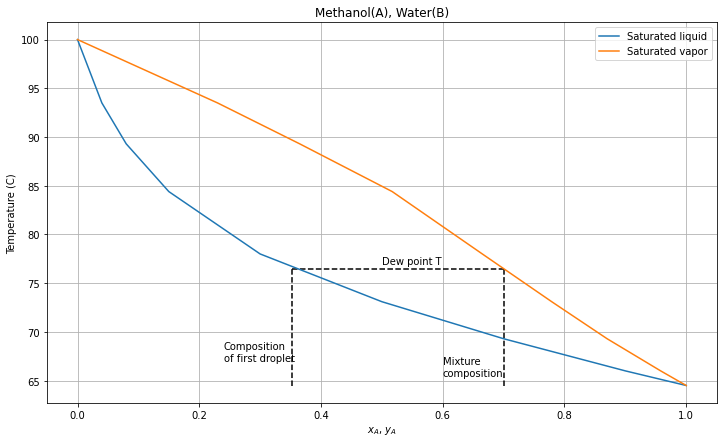

In [3]:
plt.figure(figsize=(12,7))
plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(mix,min(T),Tdew,linestyles='--',color='k')
plt.vlines(xDew,min(T),Tdew,linestyles='--',color='k')
plt.hlines(Tdew,xDew,mix,linestyles='--',color='k')


plt.text(.5,77,'Dew point T')
plt.text(.24,67,'Composition\nof first droplet')
plt.text(.6,65.5,'Mixture\ncomposition')
plt.xlabel(r'$x_A$, $y_A$')
plt.ylabel('Temperature (C)')
plt.grid()
plt.title('Methanol(A), Water(B)')
plt.legend()


;


## Problem 1.2
Determine the bubble point temperature when $x_A=0.70$ and the composition of the first bubble
</br></br>
Following similar logic as problem 1.1, the bubble point temperature can be found by using the data provided to determine $T$ when $x_A=0.70$. The composition of the first bubble is $y_A$ at the bubble point temperature. Since there is a data point for $x_A=0.70$, no interpolation is necessary
</br></br>
The bubble point temperature is $69.3\degree C$ and the compostion of the first bubble is $87.0$%.

Below is the graphical representation of the solution along with the solution from problem 1.1

In [4]:
Tbub = 69.3
ybub = 0.87

''

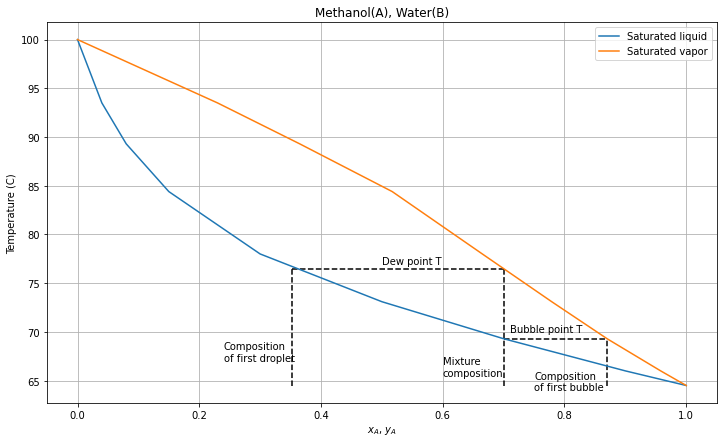

In [5]:
plt.figure(figsize=(12,7))
plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(mix,min(T),Tdew,linestyles='--',color='k')
plt.vlines(xDew,min(T),Tdew,linestyles='--',color='k')
plt.hlines(Tdew,xDew,mix,linestyles='--',color='k')

plt.hlines(Tbub,mix,ybub,linestyles='--',color='k')
plt.vlines(ybub,min(T),Tbub,linestyles='--',color='k')

plt.text(.5,77,'Dew point T')
plt.text(.24,67,'Composition\nof first droplet')
plt.text(.6,65.5,'Mixture\ncomposition')
plt.text(.71,70,'Bubble point T')
plt.text(.75,64,'Composition\nof first bubble')
plt.xlabel(r'$x_A$, $y_A$')
plt.ylabel('Temperature (C)')
plt.grid()
plt.title('Methanol(A), Water(B)')
plt.legend()


;


## Problem 1.3
Determine the temperature and composition of each phase when the mixture is is $70$% methanol and $80$% vapor
</br></br>
Using the inverse lever arm rule,
$$
\frac{V}{V+L} = \frac{composition_{mix}-x_A}{y_A-x_A} = 0.80 = \frac{0.70-x_A}{y_A-x_A}\tag{1}
$$
where V and L are the relative amounts of vapor and liquid respectively, $x_A$ is the point on the saturated liquid line at a specified temperature and $y_A$ is the point on the saturated vapor line at the same temperature. Below is a graphical representation

''

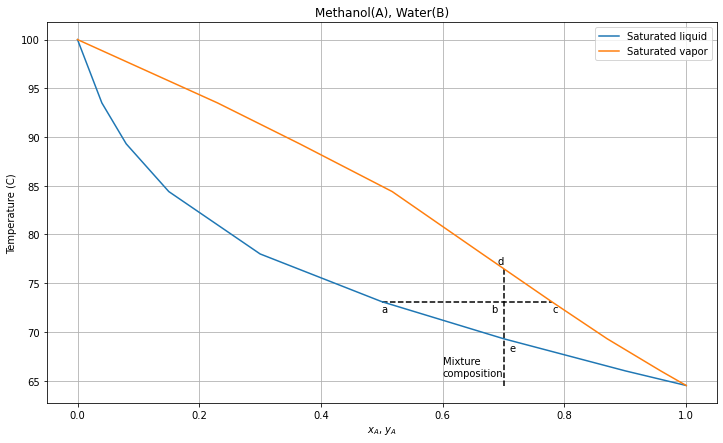

In [6]:
plt.figure(figsize=(12,7))
plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(mix,min(T),Tdew,linestyles='--',color='k')
plt.hlines(73.1,.5,.779,linestyles='--',color='k')


plt.text(.6,65.5,'Mixture\ncomposition')
plt.text(.5,72,'a')
plt.text(.68,72,'b')
plt.text(.78,72,'c')
plt.text(.69,77,'d')
plt.text(.71,68,'e')
plt.xlabel(r'$x_A$, $y_A$')
plt.ylabel('Temperature (C)')
plt.grid()
plt.title('Methanol(A), Water(B)')
plt.legend()

;


In the diagram, $\bar{ac}$ is relative and is not necessarily the correct temperature. $a$ represents the liquid composition and $c$ represents the vapor composition. To find the correct temperature, ([1](#mjx-eqn-1)) needs to be solved as
$$
0.8 = \frac{b-a}{c-a}
$$
where $b=0.70$
</br></br>
This is one equation with two unknowns but since the total composition is $0.70$, it is known that $y_A$ in ([1](#mjx-eqn-1)) must correlate with a temperature in between points $d$ and $e$. The following code solves ([1](#mjx-eqn-1)) using the interpolated set of data.

In [7]:
possibY = []                                                #loop to make array of possible y values
for i in range(len(molFrac)):
    if molFrac[i] < ybub and molFrac[i] > mix:
        possibY.append(molFrac[i])
possibY = np.array(possibY)
possibX = interpTx(interpY(possibY))                        #possible x values

In [8]:
sol = (mix-possibX)/(possibY-possibX)                       #solution to eq1
sol = sol.tolist()

for i in sol:                                               #loops to find x,y to achieve answer of 0.8
    if .8/i >=.9999 and .8/i <=1:
        percVap = i
        print(possibX[sol.index(i)],possibY[sol.index(i)],i)
print(interpY(possibY[sol.index(percVap)]))     

0.46138061015288967 0.7596519303860773 0.8000078239522271
73.92201066046555


When $80$% of the mixture is vapor the temperature is about $73.9\degree C$, the liquid composition is about $46.1$% methanol and the vapor composition is about $76.0$% methanol.

## Problem 1.4
Solve problem 1.3 using the q-line
</br></br>
The equation for the q-line is
$$
y_A = \frac{\frac{V}{F}-1}{\frac{V}{F}}x_A+\frac{F}{V}z_A \tag{2}
$$
where $\frac{V}{F}=0.80$ and $z_A=0.70$. The composition of each phase is found by finding where the q-line crosses the $x$,$y$ curve.

73.92669644249968


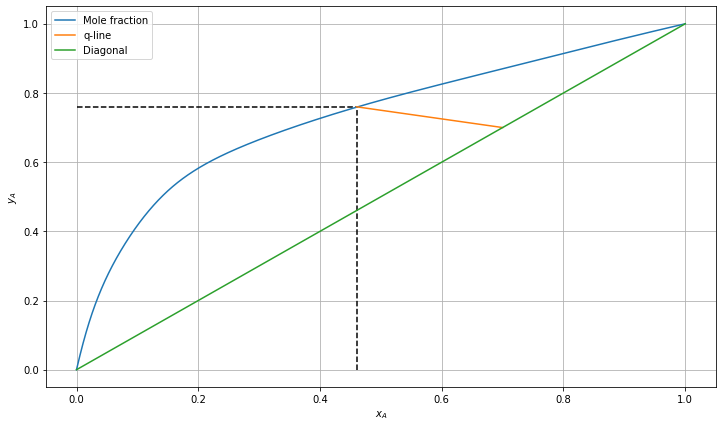

In [11]:
def qline(V,F,z,x):
    return (V/F-1)*F/V*x+F/V*z
plt.figure(figsize=(12,7))
plt.plot(interpTx(interpX(molFrac)),interpTy(interpX(molFrac)),label='Mole fraction')
plt.plot([.46,.7],qline(.8,1,.7,np.array([.46,.7])),label='q-line')
plt.plot([0,1],[0,1],label='Diagonal')
plt.hlines(qline(.8,1,.7,.46),0,.46,linestyles='--',color='k')
plt.vlines(.46,0,qline(.8,1,.7,.46),linestyles='--',color='k')
plt.xlabel(r'$x_A$')
plt.ylabel(r'$y_A$')
plt.grid()
plt.legend()

;
print(interpX(.46))

According to the q-line in the above plot, $x_A \approx 0.46$ and $y_A \approx 0.79$ which are similar to the solution found using the inverse lever-arm rule. The temperature of both phases is $73.9 \degree C$